In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Text(0, 0.5, 'Salary')

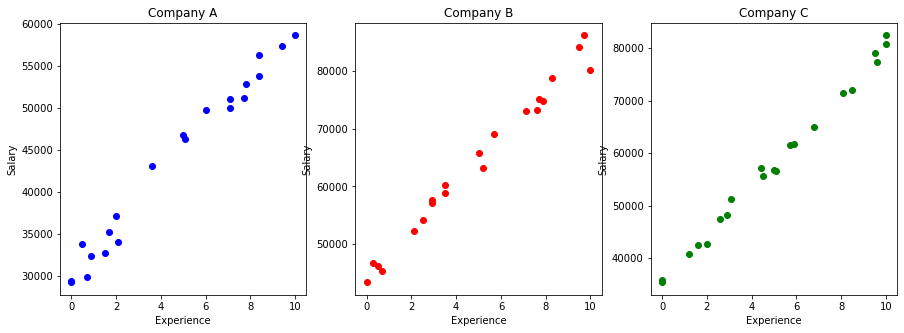

In [12]:
# Define empty lists to store the data
company_list = []
experience_list = []
salary_list = []

# Open the file
with open('hw2_data.txt', 'r') as file:
    
    # print(file.read())
    csv_reader = csv.reader(file, delimiter=',')
    
    # Skip the header row (if it exists)
    next(csv_reader, None)
    
    # Loop through the rows and extract X and Y values
    for row in csv_reader:
        if len(row) == 3:
            company_list.append(row[0].strip())
            experience_list.append(float(row[1].strip()))
            salary_list.append(float(row[2].strip()))

salary_A = []; experience_A = []
salary_B = []; experience_B = []
salary_C = []; experience_C = []

for index, company_name in enumerate(company_list):
    if company_name == 'A':
        salary_A.append(salary_list[index])
        experience_A.append(experience_list[index])

    elif company_name == 'B':
        salary_B.append(salary_list[index])
        experience_B.append(experience_list[index])

    elif company_name == 'C':
        salary_C.append(salary_list[index])
        experience_C.append(experience_list[index])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(experience_A, salary_A, color='blue')
ax[0].set_title('Company A')
ax[0].set_xlabel('Experience')
ax[0].set_ylabel('Salary')

ax[1].scatter(experience_B, salary_B, color='red')
ax[1].set_title('Company B')
ax[1].set_xlabel('Experience')
ax[1].set_ylabel('Salary')

ax[2].scatter(experience_C, salary_C, color='green')
ax[2].set_title('Company C')
ax[2].set_xlabel('Experience')
ax[2].set_ylabel('Salary')

In [14]:
def loss_function(m, b, points):
    total_error = 0
    for point in points:
        x = point[0]
        y = point[1]
        total_error += (y - (m * x + b)) ** 2            

    return total_error / len(points)

def gradient_descent(m_now, b_now, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = len(points)

    for point in points:
        x = point[0]
        y = point[1]
        m_gradient += -(2 / N) * x * (y - (m_now * x + b_now))
        b_gradient += -(2 / N) * (y - (m_now * x + b_now))    

    m_new = m_now - (learning_rate * m_gradient)
    b_new = b_now - (learning_rate * b_gradient)

    return m_new, b_new

Iteration 0: m = 18.764019047619044, b = 30002.676095238094, loss = 276239925.1272383
Iteration 100: m = 1394.789042697217, b = 30198.077194560632, loss = 76992270.6678081
Iteration 200: m = 2114.0908650995552, b = 30298.715232304763, loss = 22578177.45502183
Iteration 300: m = 2490.198079221052, b = 30349.841803141037, loss = 7717298.575697384
Iteration 400: m = 2686.955768124697, b = 30375.104602542084, loss = 3658182.562016849
Iteration 500: m = 2789.986785194454, b = 30386.86147119645, loss = 2548974.856497243
Iteration 600: m = 2844.0362864321846, b = 30391.570351125618, loss = 2245379.44637191
Iteration 700: m = 2872.487391079917, b = 30392.60599130998, loss = 2161801.412905095
Iteration 800: m = 2887.559756514395, b = 30391.731913397478, loss = 2138318.055863329
Iteration 900: m = 2895.6391918275463, b = 30389.86963764709, loss = 2131255.2875913405


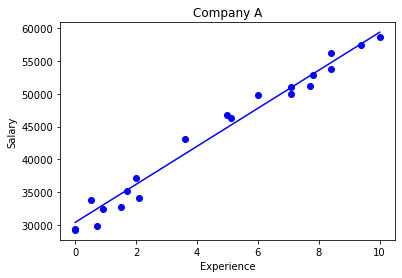

Text(0, 0.5, 'Loss')

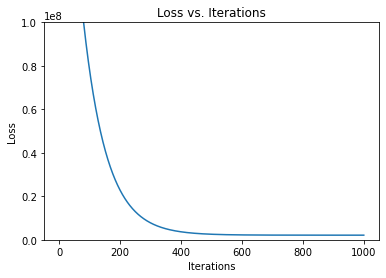

In [49]:
num_iterations = 1000
m = 0
b = 30000
lr = 0.0001
points = [np.array([experience_A[i], salary_A[i]]) for i in range(len(experience_A))]
loss_list = []

for i in range(num_iterations):
    m, b = gradient_descent(m, b, points, lr)
    loss = loss_function(m, b, points)
    loss_list.append(loss)

    if i % 100 == 0:
        print(f'Iteration {i}: m = {m}, b = {b}, loss = {loss_function(m, b, points)}')

plt.plot(experience_A, [m * x + b for x in experience_A], color='blue')
plt.scatter(experience_A, salary_A, color='blue', label=f"loss = {loss_function(m, b, points)}")
plt.title('Company A')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

plt.plot(np.linspace(0, 1000, 1000), loss_list)
plt.ylim(0, 1e8)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Iteration 0: m = 1034.8119523809523, b = 30005.840666666667, loss = 937527451.5458863
Iteration 100: m = 3523.3510707584383, b = 30447.048751745093, loss = 275068788.64143515
Iteration 200: m = 4749.996212627783, b = 30706.473891098434, loss = 112056855.22010946
Iteration 300: m = 5351.68654982483, b = 30875.622572320626, loss = 71565951.09120111
Iteration 400: m = 5643.884546834914, b = 30999.817493520026, loss = 61135600.34221862
Iteration 500: m = 5782.831968848013, b = 31101.507477624033, loss = 58085047.42086062
Iteration 600: m = 5845.91189454119, b = 31191.812386260917, loss = 56850601.13787534
Iteration 700: m = 5871.450342996797, b = 31276.241074591413, loss = 56067411.09041446
Iteration 800: m = 5878.429188426711, b = 31357.523374993252, loss = 55400609.24413241
Iteration 900: m = 5876.249555210851, b = 31437.01271949678, loss = 54767984.49773139


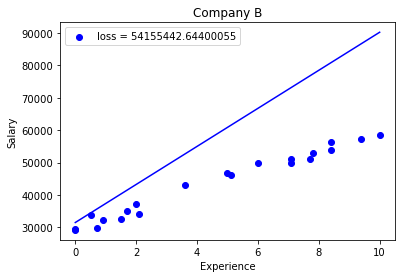

In [52]:
num_iterations = 1000
m = 1000
b = 30000
lr = 0.0001
points = [np.array([experience_B[i], salary_B[i]]) for i in range(len(experience_B))]

for i in range(num_iterations):
    m, b = gradient_descent(m, b, points, lr)

    if i % 100 == 0:
        print(f'Iteration {i}: m = {m}, b = {b}, loss = {loss_function(m, b, points)}')

plt.plot(experience_A, [m * x + b for x in experience_A], color='blue')
plt.scatter(experience_A, salary_A, color='blue', label=f"loss = {loss_function(m, b, points)}")
plt.title('Company B')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()